# Assignment 4

For this assignment we had to draw univarate graphs for some variables and then a bivarate graph.

In [1]:
# import the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('ticks')

In [2]:
# show all columns
pd.set_option('display.max_columns', None)
# loading the data from the local file
df = pd.read_csv('data/covid_data.csv')

In [3]:
df.date = pd.to_datetime(df.date)
dfx = df.dropna(subset=['continent'])  # gets rid of summaries for 'world' and 'africa' etc, as I only want data for countries
cols = ['location', 'date', 'new_cases_per_million', 'new_deaths_per_million', 'people_fully_vaccinated_per_hundred', 'human_development_index']
dfx = dfx[cols].dropna(subset=cols)
dfx[dfx.new_cases_per_million < 0]  # this is clearly ridiculous, I assume there was some errors in recording that had to be corrected

,location,date,new_cases_per_million,new_deaths_per_million,people_fully_vaccinated_per_hundred,human_development_index
20266,Czechia,2021-03-22,-206.742,13.353,3.49,0.900
21136,Denmark,2021-03-24,-345.464,0.173,5.96,0.940
34851,Iceland,2021-02-08,-2.930,0.000,1.42,0.949
38074,Israel,2021-04-17,-6.123,1.733,57.78,0.919
72267,Spain,2021-03-02,-1590.147,4.107,2.75,0.904
80525,United Kingdom,2021-04-09,-70.515,0.884,10.30,0.932


In [4]:
# getting rid of rows where new cases and deaths are below zero
dfx = dfx[dfx.new_cases_per_million >= 0]
dfx = dfx[dfx.new_deaths_per_million >= 0]

For the purpsoses of this exercise, I have limited the data I am using to countries with a Human Development Index above 0.9, in an attempt to compare like with like.

I have also limited the data to data from 2021 which is when vaccinations really started

In [5]:
# limiting it to 2021 which is when vaccinations really got started
dfx = dfx[dfx['date'].dt.year == 2021]
# so as to compare like with like, i'm keeping only countries with human development indices over 0.9
dfx = dfx[dfx.human_development_index > 0.9]

In [6]:
# to get the cases, deaths and vaccinations all in the same units, per 100k people
dfx['new_cases_per_100k'] = dfx.new_cases_per_million/10
dfx['new_deaths_per_100k'] = dfx.new_deaths_per_million/10
dfx['people_fully_vaccinated_per_100k'] = dfx.people_fully_vaccinated_per_hundred * 1000

In [7]:
# tidying up the columns again
cols = ['location', 'date', 'new_cases_per_100k', 'new_deaths_per_100k', 'people_fully_vaccinated_per_100k']
dfx = dfx[cols]
dfx

,location,date,new_cases_per_100k,new_deaths_per_100k,people_fully_vaccinated_per_100k
5245,Austria,2021-01-15,16.9657,0.7328,0.0
5246,Austria,2021-01-16,19.1308,0.7328,0.0
5247,Austria,2021-01-17,14.0678,0.3220,0.0
5248,Austria,2021-01-18,12.8908,0.4441,10.0
5249,Austria,2021-01-19,16.4994,0.8549,30.0
...,...,...,...,...,...
81005,United States,2021-04-25,9.6872,0.0843,28340.0
81006,United States,2021-04-26,14.4080,0.1432,28670.0
81007,United States,2021-04-27,15.3642,0.1937,28930.0
81008,United States,2021-04-28,16.6539,0.2897,29320.0


### Descriptions of all the variables

I have printed descriptions of all the variables, grouped by country.

In [8]:
dfx.groupby('location')['new_cases_per_100k'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Austria,105.0,24.054744,7.957544,11.2031,16.965700,23.18350,29.734400,43.2470
Belgium,101.0,25.980924,12.388221,0.0000,17.964400,23.81440,31.191700,78.2166
Canada,114.0,13.868898,6.227184,4.6712,8.501075,11.32285,19.380175,28.4139
Denmark,104.0,11.190943,4.682505,4.3852,8.265400,10.57455,13.021825,37.3260
Finland,82.0,8.712657,3.335672,2.8155,6.280800,7.87805,11.352350,15.5756
France,103.0,38.408089,26.717537,0.0293,27.969400,35.15310,46.899650,173.0066
Germany,119.0,16.353782,10.248792,0.8928,8.384100,13.01320,24.399700,54.1070
Iceland,43.0,2.098984,2.451693,0.0000,0.439550,1.46520,2.637400,12.6007
Ireland,77.0,12.091729,4.459398,5.4680,8.688100,11.17910,13.892800,26.9553


In [9]:
dfx.groupby('location')['new_deaths_per_100k'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Austria,105.0,0.344521,0.145677,0.1110,0.244300,0.32200,0.410800,0.8549
Belgium,101.0,0.316522,0.121808,0.0000,0.241600,0.30200,0.388300,0.8974
Canada,114.0,0.180724,0.124657,0.0344,0.082775,0.12980,0.254350,0.5061
Denmark,104.0,0.136457,0.183179,0.0000,0.034500,0.05180,0.176925,1.0359
Finland,82.0,0.053695,0.068594,0.0000,0.000000,0.03610,0.072200,0.3249
France,103.0,0.484230,0.278333,0.0000,0.284650,0.45490,0.585500,1.4791
Germany,119.0,0.492203,0.404189,0.0251,0.210650,0.35570,0.649300,2.0696
Iceland,43.0,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.0000
Ireland,77.0,0.331403,0.351734,0.0000,0.040500,0.20250,0.445500,1.3366


In [10]:
dfx.groupby('location')['people_fully_vaccinated_per_100k'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Austria,105.0,3603.428571,2771.898068,0.0,1560.0,2880.0,5580.0,9200.0
Belgium,101.0,3294.554455,2087.460910,0.0,1900.0,3200.0,5080.0,6720.0
Canada,114.0,1252.456140,855.866338,0.0,350.0,1475.0,1835.0,2870.0
Denmark,104.0,4571.153846,3017.246963,0.0,2675.0,3575.0,7017.5,10900.0
Finland,82.0,1431.097561,587.360713,80.0,1212.5,1555.0,1620.0,2880.0
France,103.0,3097.087379,2467.001685,0.0,830.0,3010.0,4575.0,8940.0
Germany,119.0,2985.966387,2393.573429,0.0,700.0,2660.0,4980.0,7620.0
Iceland,43.0,4689.302326,2674.595114,140.0,3020.0,3760.0,6510.0,10380.0
Ireland,77.0,4076.103896,2011.666732,280.0,2720.0,3350.0,5500.0,8330.0


## Graphs

### Univariate graphs

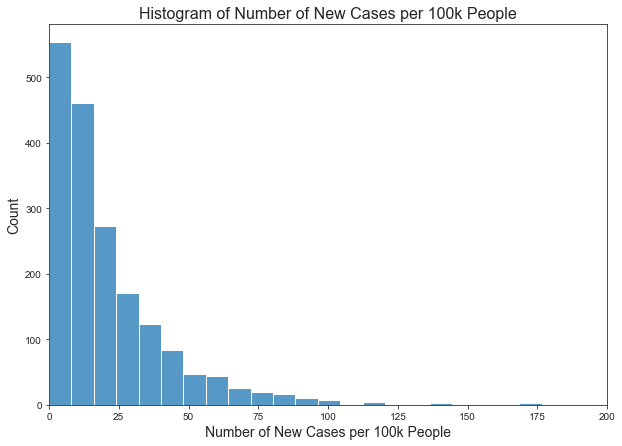

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = ax.set_xlim(0, 200)
plt.title('Histogram of Number of New Cases per 100k People', size=16)
plt.xlabel('Number of New Cases per 100k People', size=14)
plt.ylabel('Count', size=14)
_ = sns.histplot(data=dfx, x='new_cases_per_100k', bins=25)

This graph is unimodal, with the highest peak at 0 new cases, and clearly right skewed, with most values being at the lower end of the scale.

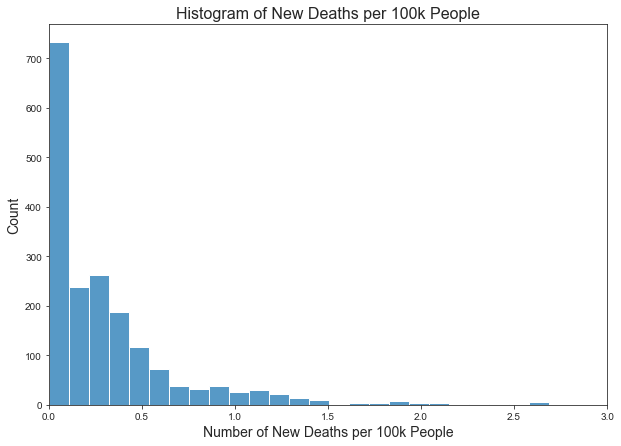

In [12]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = ax.set_xlim(0, 3)
plt.title('Histogram of New Deaths per 100k People', size=16)
plt.xlabel('Number of New Deaths per 100k People', size=14)
plt.ylabel('Count', size=14)
_ = sns.histplot(data=dfx, x='new_deaths_per_100k', bins=25)

This graph is unimodal, with the highest peak at 0 new deaths, and clearly right skewed, with most values being at the lower end of the scale.

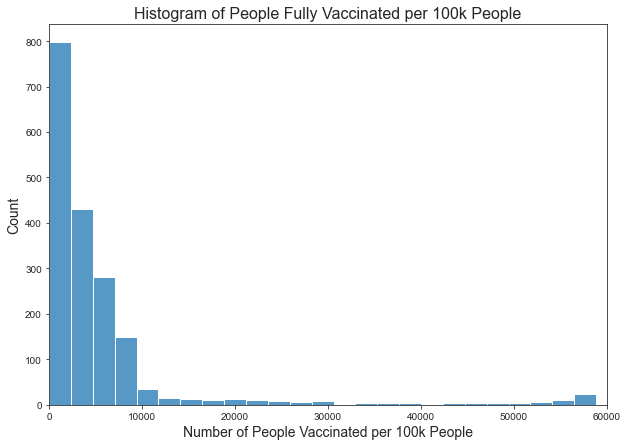

In [13]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = ax.set_xlim(0, 60000)
plt.title('Histogram of People Fully Vaccinated per 100k People', size=16)
plt.xlabel('Number of People Vaccinated per 100k People', size=14)
plt.ylabel('Count', size=14)
_ = sns.histplot(data=dfx, x='people_fully_vaccinated_per_100k', bins=25)

This graph is unimodal, with the highest peak at 0 people fully vaccinated, and clearly right skewed, with most values being at the lower end of the scale, though there is a tiny little bump at the very highest value, which is interesting.

## Bivariate graphs

I have plotted number of people fully vaccinated against both death rates and case rates

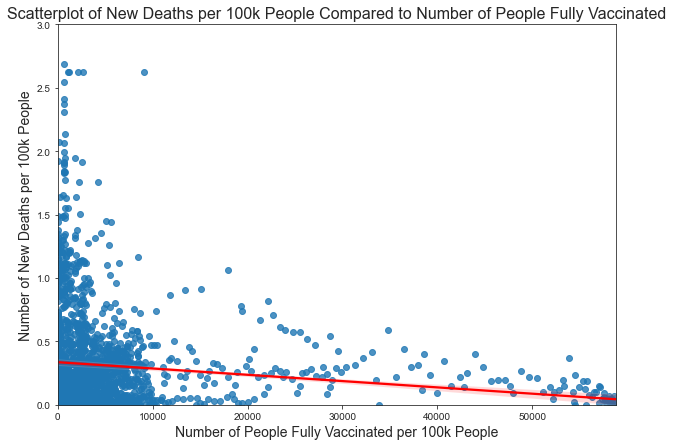

In [19]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_ylim(0, 3)
plt.title('Scatterplot of New Deaths per 100k People Compared to Number of People Fully Vaccinated', size=16)
sns.regplot(data=dfx, x='people_fully_vaccinated_per_100k', y='new_deaths_per_100k', line_kws={'color':'red'})
plt.xlabel(xlabel='Number of People Fully Vaccinated per 100k People', size=14)
_ = plt.ylabel('Number of New Deaths per 100k People', size=14)

As you can see, there seems to be a negative correlation between the number of people fully vaccinated and the number of new deaths per 100k people.

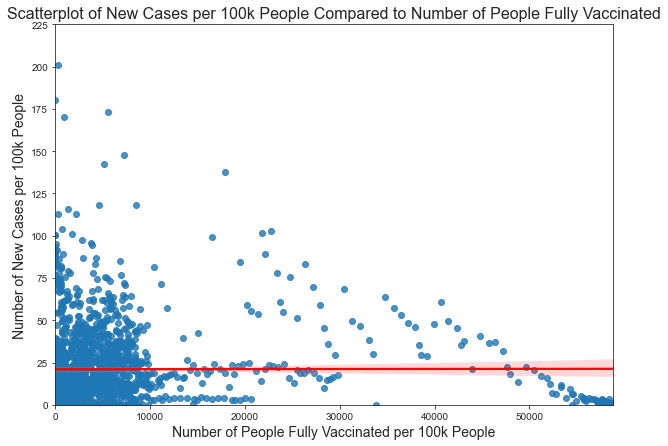

In [18]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_ylim(0, 225)
plt.title('Scatterplot of New Cases per 100k People Compared to Number of People Fully Vaccinated', size=16)

sns.regplot(data=dfx, x='people_fully_vaccinated_per_100k', y='new_cases_per_100k', line_kws={'color':'red'})
plt.xlabel(xlabel='Number of People Fully Vaccinated per 100k People', size=14)
_ = plt.ylabel('Number of New Cases per 100k People', size=14)

There doesn't seem to be any correlation between the number of people fully vaccinated and the number of new cases per 100k people.

## Summary

There does seem to be a clear trend that when the number of people fully vaccinated increases, the number of new deaths per 100k people decreases.

There is no similar clear trend for new cases per 100k people.